# 1 INTRODUCTION


## 1.1 Project Goal

To develop a comprehensive data analysis pipeline and a robust machine learning model to accurately predict movie success categories (Hit, Average, Flop) based on various movie attributes. By utilizing this model, the studio aims to improve movie production decisions, marketing strategies, and overall film industry insights.


## 1.2 Describing Data

The dataset contains 28 variables for 5043 movies, spanning across 100 years in 66 countries. There are 2399 unique director names, and thousands of actors/actresses. “imdb_score” is the response variable while the other 27 variables are possible predictors.

|Variable Name |	Description|
| --- | --- |
|movie_title	 | Title of the Movie|
|duration	| Duration in minutes|
|director_name	| Name of the Director of the Movie|
|director_facebook_likes |	Number of likes of the Director on his Facebook Page|
|actor_1_name |	Primary actor starring in the movie|
|actor_1_facebook_likes |	Number of likes of the Actor_1 on his/her Facebook Page|
|actor_2_name |	Other actor starring in the movie|
|actor_2_facebook_likes	| Number of likes of the Actor_2 on his/her Facebook Page|
|actor_3_name |	Other actor starring in the movie|
|actor_3_facebook_likes |	Number of likes of the Actor_3 on his/her Facebook Page|
|num_user_for_reviews |	Number of users who gave a review|
|num_critic_for_reviews |	Number of critical reviews on imdb|
|num_voted_users | 	Number of people who voted for the movie|
|cast_total_facebook_likes |	Total number of facebook likes of the entire cast of the movie|
|movie_facebook_likes |	Number of Facebook likes in the movie page|
|plot_keywords |	Keywords describing the movie plot|
|facenumber_in_poster |	Number of the actor who featured in the movie poster|
|color |	Film colorization. ‘Black and White’ or ‘Color’|
|genres |	Film categorization like ‘Animation’, ‘Comedy’, ‘Romance’, ‘Horror’, ‘Sci-Fi’, ‘Action’, ‘Family’|
|title_year |	The year in which the movie is released (1916:2016)|
|language |	English, Arabic, Chinese, French, German, Danish, Italian, Japanese etc|
|country |	Country where the movie is produced|
|content_rating |	Content rating of the movie|
|aspect_ratio |	Aspect ratio the movie was made in|
|movie_imdb_link |	IMDB link of the movie|
|gross |	Gross earnings of the movie in Dollars|
|budget |	Budget of the movie in Dollars|
|imdb_score |	IMDB Score of the movie on IMDB|

Lets see which features influence the target varible(IMDB Score)

# 2 DATA EXPLORATION

## 2.1 Importing necessary Libraries


In [39]:
#Importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

import warnings 
from warnings import filterwarnings
filterwarnings("ignore")


In [40]:
#Reading the dataset
data=pd.read_csv('movie_metadata.csv',encoding='unicode_escape')
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## 2.2 Categorizing the target varible 


In [41]:
#Categorising the target variable 
bins = [ 1, 3, 6, 10]
labels = ['FLOP', 'AVG', 'HIT']
data['box_office_status'] = pd.cut(data['imdb_score'], bins=bins, labels=labels)


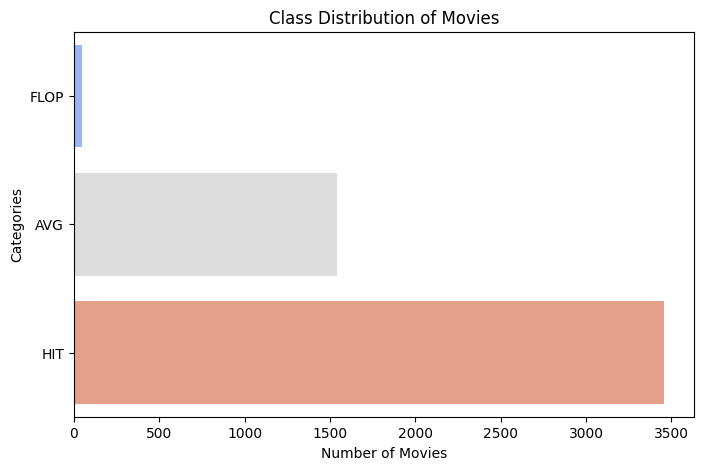

In [42]:
# Visualize the class distribution
plt.figure(figsize=(8, 5))
sns.countplot(data['box_office_status'], palette="coolwarm")
plt.title("Class Distribution of Movies")
plt.ylabel("Categories")
plt.xlabel("Number of Movies")
plt.show()


In [43]:
#Checking the new column
data.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,box_office_status
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,HIT
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,HIT
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,HIT
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,HIT
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,HIT


In [44]:
#Shape of the dataset
data.shape

(5043, 29)

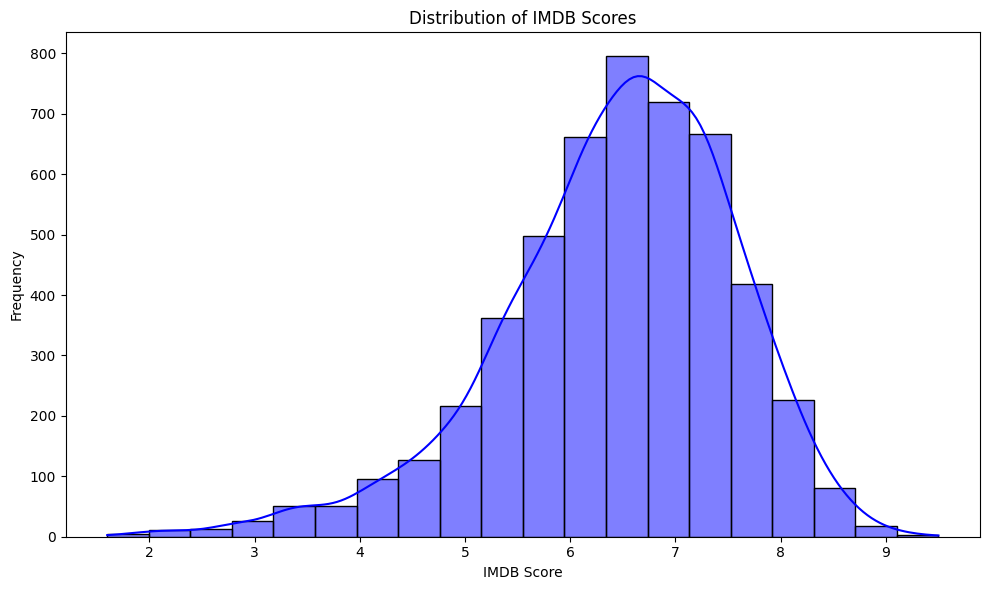

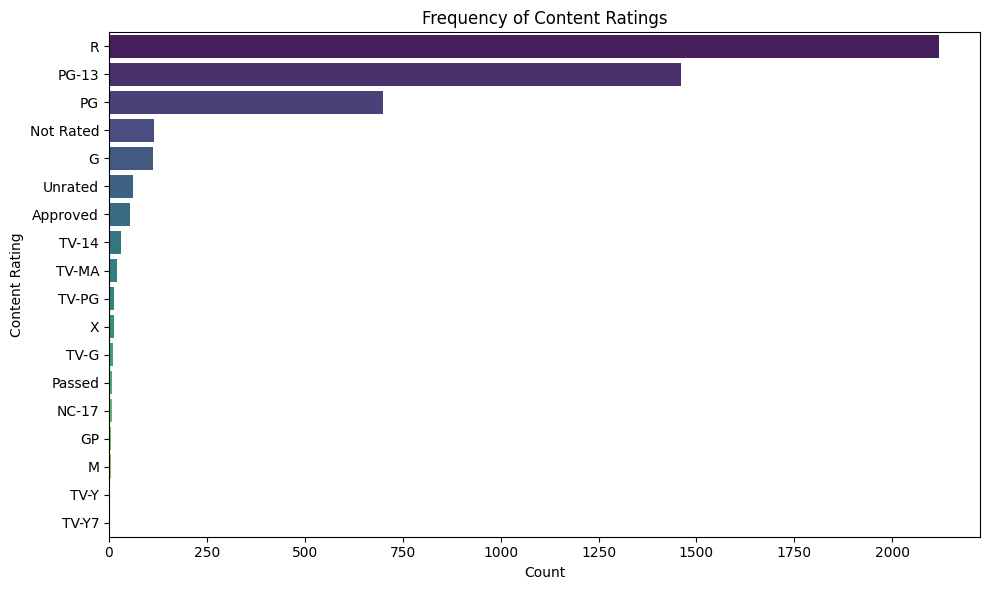

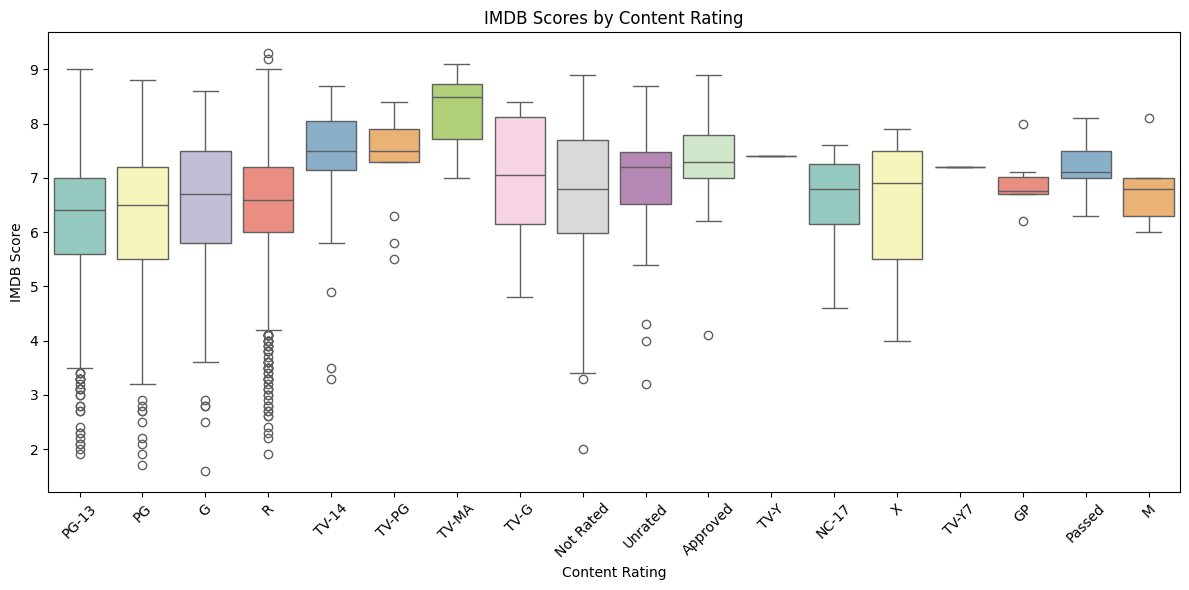

In [45]:
def visualize_data(data):
    # Distribution of IMDB Scores
    plt.figure(figsize=(10, 6))
    sns.histplot(data['imdb_score'], bins=20, kde=True, color='blue')
    plt.title("Distribution of IMDB Scores")
    plt.xlabel("IMDB Score")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

    # Bar plot of content ratings
    plt.figure(figsize=(10, 6))
    sns.countplot(data['content_rating'], order=data['content_rating'].value_counts().index, palette="viridis")
    plt.title("Frequency of Content Ratings")
    plt.ylabel("Content Rating")
    plt.xlabel("Count")
    plt.tight_layout()
    plt.show()

    # Box plot of IMDB Scores by Genre
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='content_rating', y='imdb_score', data=data, palette="Set3")
    plt.title("IMDB Scores by Content Rating")
    plt.xlabel("Content Rating")
    plt.ylabel("IMDB Score")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

visualize_data(data)

## 2.3 Handling the Missing values

Every datset have some missing values, lets find out in which cloumns they are?

In [46]:
#Total null values present in each column
data.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
box_office_status              0
dtype: int64

In [47]:
#Droping the samples that have missing values
data.dropna(inplace=True)

In [48]:
#Final shape of the data after Droping missing values
data.shape

(3755, 29)

In [49]:
#List of variables in the datset
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes',
       'box_office_status'],
      dtype='object')

In [50]:
#Describing the categorical data
data.describe(include='object')

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
count,3755,3755,3755,3755,3755,3755,3755,3755,3755,3755,3755,3755
unique,2,1658,2187,745,1427,3654,2586,3655,3655,33,45,12
top,Color,Steven Spielberg,Morgan Freeman,Comedy|Drama|Romance,Robert De Niro,Victor FrankensteinÂ,Steve Coogan,halloween|masked killer|michael myers|slasher|...,http://www.imdb.com/title/tt0077651/?ref_=fn_t...,English,USA,R
freq,3631,25,20,147,42,3,8,3,3,3598,2986,1700


In [51]:
#Dropping 2 columns
data.drop(columns=['movie_title','movie_imdb_link'],inplace=True)   

## 2.4 Label Encoding


In [52]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cat_list=['color', 'director_name', 'actor_2_name',
        'genres', 'actor_1_name',
        'actor_3_name',
        'plot_keywords',
        'language', 'country', 'content_rating',
       'title_year', 'aspect_ratio','box_office_status']

for col in cat_list:
    data[col] = le.fit_transform(data[col])

In [53]:
#A sample of data after label encoding
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,box_office_status
0,1,620,723.0,178.0,0.0,855.0,1001,1000.0,760505847.0,91,...,9,43,7,237000000.0,66,936.0,7.9,7,33000,2
1,1,538,302.0,169.0,563.0,1000.0,1591,40000.0,309404152.0,85,...,9,43,7,300000000.0,64,5000.0,7.1,12,0,2
2,1,1394,602.0,148.0,0.0,161.0,1794,11000.0,200074175.0,107,...,9,42,7,245000000.0,72,393.0,6.8,12,85000,2
3,1,251,813.0,164.0,22000.0,23000.0,380,27000.0,448130642.0,243,...,9,43,7,250000000.0,69,23000.0,8.5,12,164000,2
5,1,62,462.0,132.0,475.0,530.0,1836,640.0,73058679.0,105,...,9,43,7,263700000.0,69,632.0,6.6,12,24000,2


## 2.5 Correlation

To find out whether there is any relation between variables, in other terms multicollineariaty.



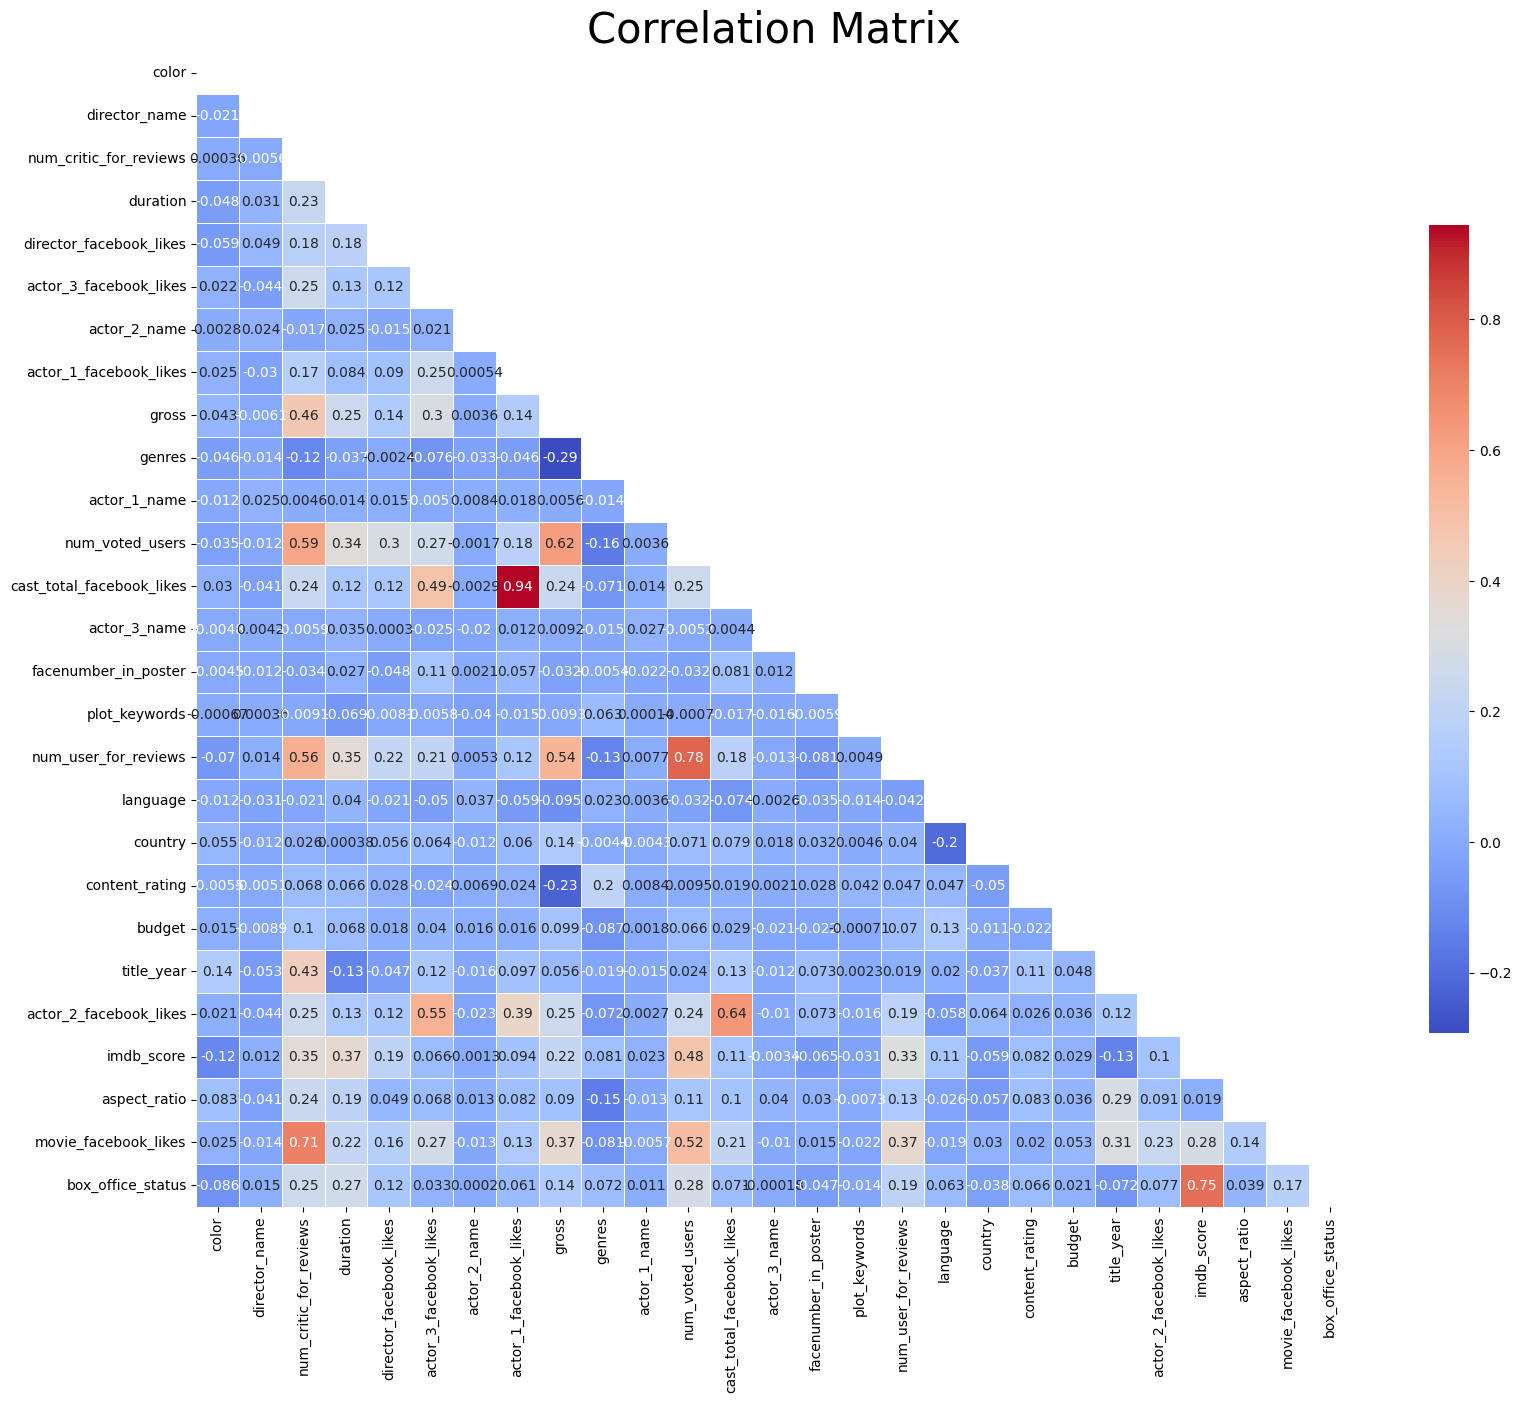

In [54]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(20,15))
sns.heatmap(corr, 
            xticklabels=corr.columns, 
            yticklabels=corr.columns, 
            cmap='coolwarm', 
            annot=True, 
            mask=mask, 
            square=True, 
            linewidths=0.5, 
            linecolor='white', 
            cbar_kws={'shrink': 0.7}
            )
plt.title('Correlation Matrix', fontsize = 30)
plt.show()

In [55]:
#Removing few columns due to multicollinearity
data.drop(columns=['cast_total_facebook_likes','num_critic_for_reviews'],inplace=True)

In [56]:
#Removing the column "imdb_score" since we have "box_office_status"
data.drop(columns=['imdb_score'],inplace=True)

In [57]:
data.shape

(3755, 24)

# 3 CLASSIFICATION MODEL BUILDING

In [58]:
# Independent Variables
X = data.drop(data.columns[23], axis=1).values

# Dependent/Target Variable
y = data.iloc[:, 23].values


## 3.1 Train Test Split

We need data not only to train our model but also to test our model. So splitting the dataset into 70:30 (Train:Test) ratio.We have a predefined a function in Sklearn library called test_train_split, lets use that.

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape: (2628, 23) (2628,)
Testing data shape: (1127, 23) (1127,)


## 3.2 Scaling


In [60]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 3.3 Feature Selection using RFECV



In [61]:
#Performing Recursive Feauture Elimation with Cross Validation
#Using Random forest for RFE-CV and logloss as scoring

from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss

clf_rf=RandomForestClassifier(random_state=0)
rfecv=RFECV(estimator=clf_rf, step=1,cv=5,scoring='neg_log_loss')
rfecv=rfecv.fit(X_train,y_train)

In [62]:
#Optimal number of features

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 22
Best features : Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22],
      dtype='int64')


In [63]:
#Feauture Ranking

clf_rf = clf_rf.fit(X_train,y_train)
importances = clf_rf.feature_importances_

std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]


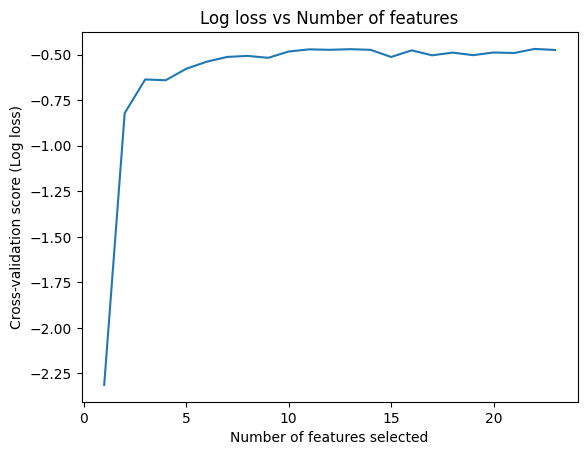

In [64]:
#  Plotting Log Loss vs. Number of Features
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (Log loss)")
plt.title("Log loss vs Number of features")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

In [65]:
#Selecting the Important Features
X_opt = X_train.iloc[:,X_train.columns[rfecv.support_]]
X_test = X_test.iloc[:,X_test.columns[rfecv.support_]]

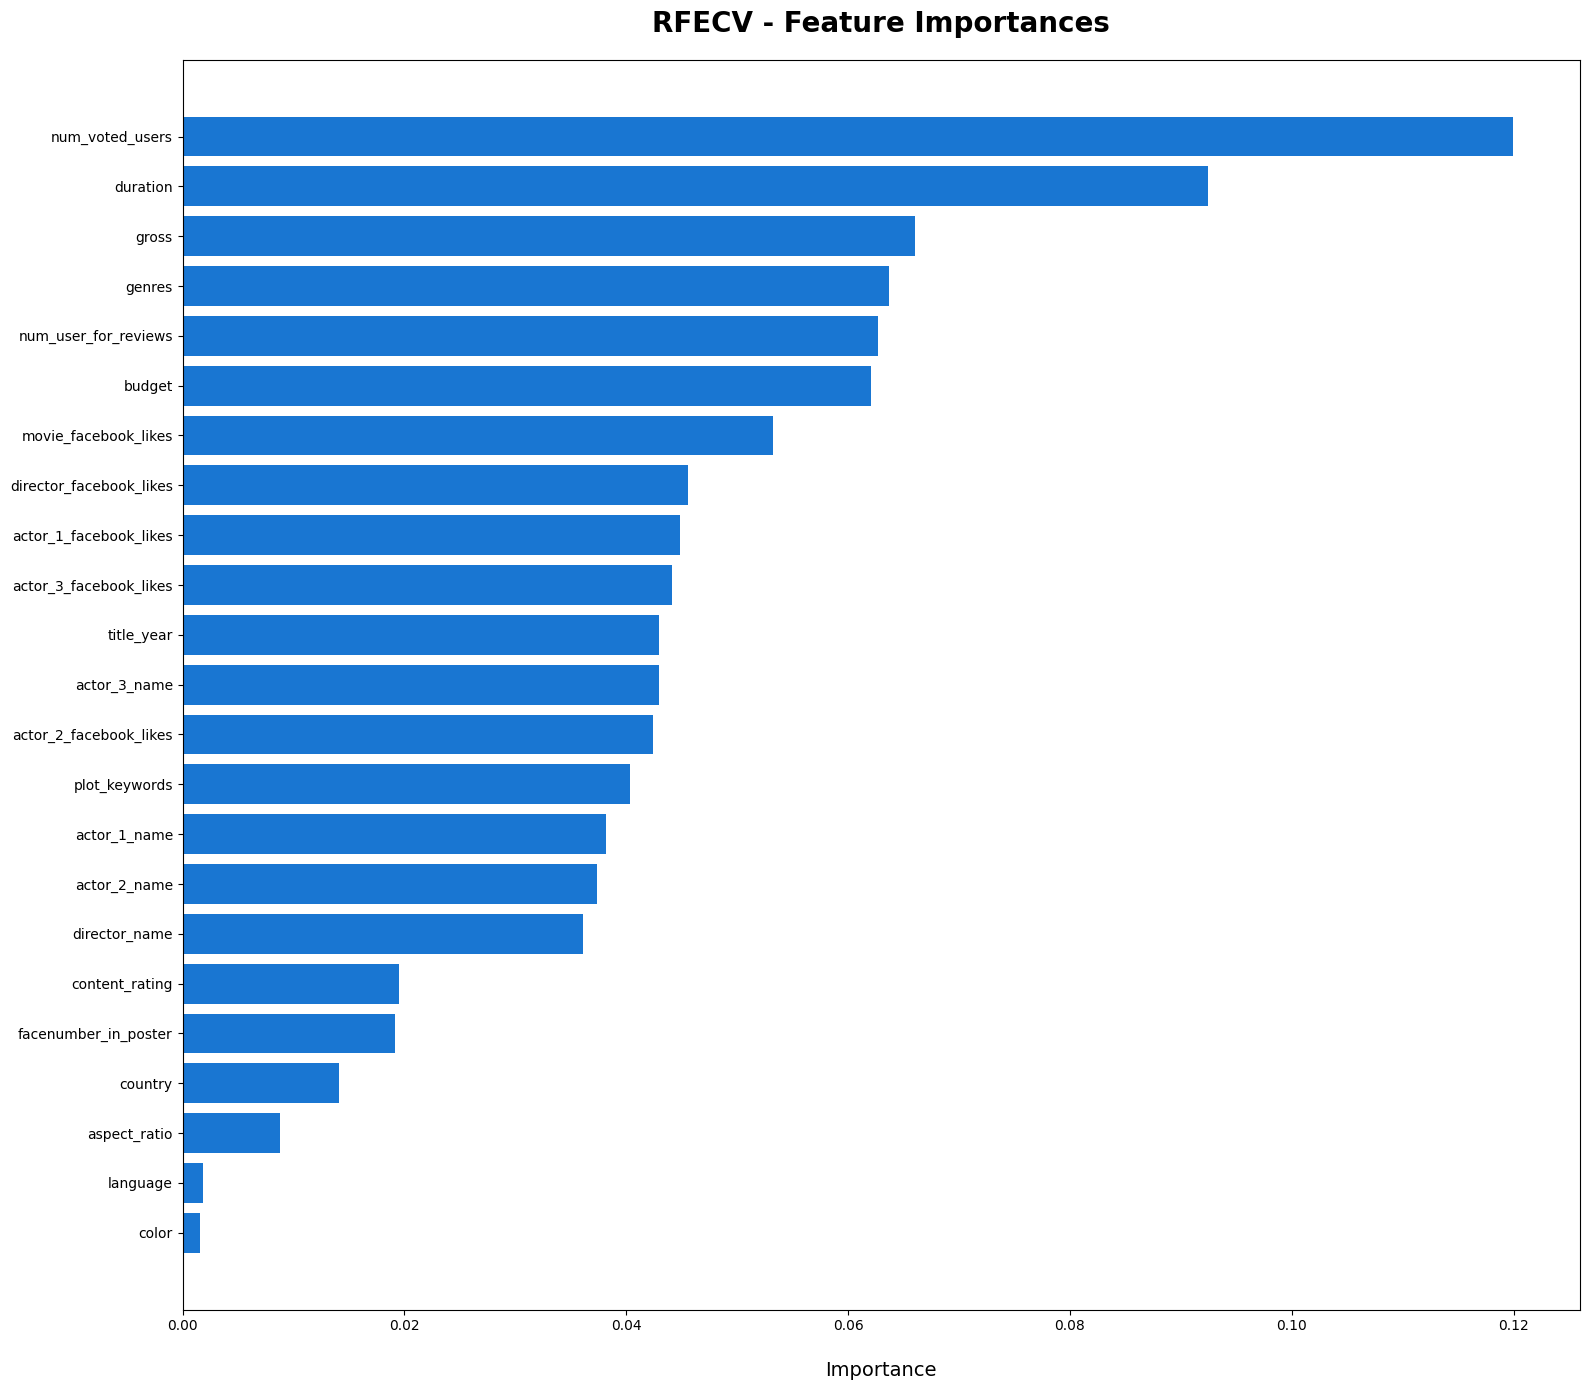

In [66]:
# Creating a new dataframe with column names and feature importance
dset = pd.DataFrame({'attr': data.drop(columns=['box_office_status'], inplace=False).columns, 
                     'importance': clf_rf.feature_importances_})

# Sorting with importance column
dset = dset.sort_values(by='importance', ascending=True)

# Barplot indicating Feature Importance
plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.tight_layout()
plt.show()

## 3.4 Random Forest


In [67]:
#Training the Random Forest Classifer on Train data
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
classifier.fit(X_opt, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [68]:
#Predicting the target variable
y_pred = classifier.predict(X_test)

## 3.5 Confusion Matrix

Confusion matrix gives a clear view of ground truth and prediction.

In [69]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,y_pred)

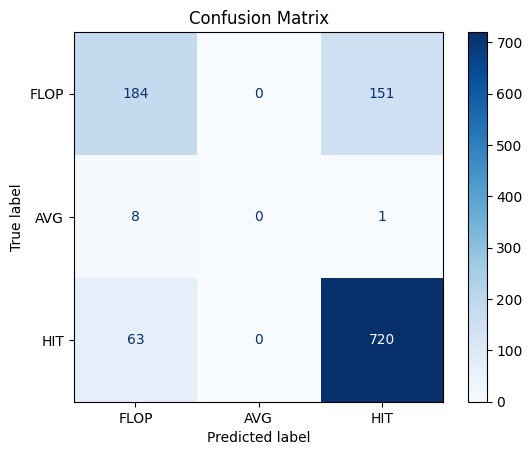

In [70]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['FLOP', 'AVG', 'HIT'])
cm_display.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


# 3.6 Classification Report

In [71]:
#Classification Report
from sklearn.metrics import classification_report

# Define the target names
target_names = ['Average','Flop','Hit']
cr = classification_report(y_test,y_pred,target_names=target_names)
print(cr)

              precision    recall  f1-score   support

     Average       0.72      0.55      0.62       335
        Flop       0.00      0.00      0.00         9
         Hit       0.83      0.92      0.87       783

    accuracy                           0.80      1127
   macro avg       0.52      0.49      0.50      1127
weighted avg       0.79      0.80      0.79      1127



In [72]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Accuracy:  0.8021295474711624


# ROC AUC Curve

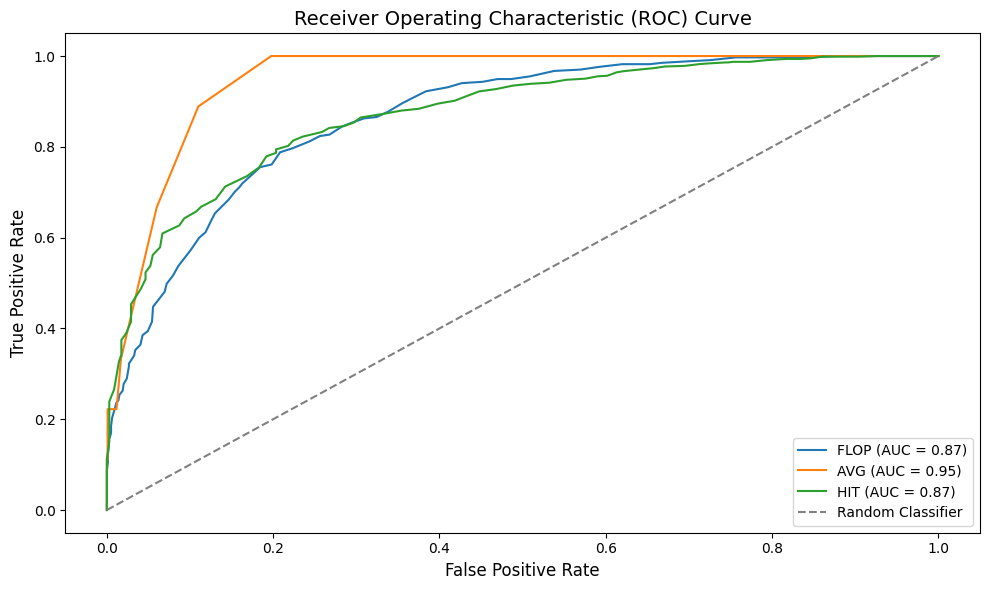

In [73]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the output for multiclass classification
y_bin = label_binarize(y_test, classes=[0, 1, 2])

# Get predicted probabilities
y_pred_bin = classifier.predict_proba(X_test)

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Define the class labels
class_labels = ['FLOP', 'AVG', 'HIT']

# Loop through each class
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for all classes
plt.figure(figsize=(10, 6))

# Plot the ROC curves for each class
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'{class_labels[i]} (AUC = {roc_auc[i]:.2f})')

# Plot the diagonal (random classifier)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')

# Customize the plot
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right')

# Show the plot
plt.tight_layout()
plt.show()


## XG Boost

In [74]:
import xgboost as xgb

model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)
model.fit(X_opt, y_train)
y_pred_xgb = model.predict(X_test)
from sklearn.metrics import classification_report

cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.72      0.55      0.62       335
           1       0.00      0.00      0.00         9
           2       0.83      0.92      0.87       783

    accuracy                           0.80      1127
   macro avg       0.52      0.49      0.50      1127
weighted avg       0.79      0.80      0.79      1127



## Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Logistic Regression
param_grid = {
    'C': [1],  # Regularization strength
    'solver': ['liblinear'],  # Solvers to consider
    'max_iter': [100],  # Maximum number of iterations
    'penalty': ['l1'],  # Regularization type
}

# Create GridSearchCV instance
grid_search = GridSearchCV(estimator=LogisticRegression(random_state=0),
                           param_grid=param_grid, 
                           cv=5,  # 5-fold cross-validation
                           n_jobs=-1,  # Use all CPU cores
                           verbose=2)  # Print progress

# Fit the grid search
grid_search.fit(X_opt, y_train)

# Print the best parameters found by GridSearchCV
print("Best parameters found:", grid_search.best_params_)

# Get the best estimator (model) from grid search
classifier = grid_search.best_estimator_

# Optional: Evaluate the best model on the test set
y_pred = classifier.predict(X_test)

#Classification Report
from sklearn.metrics import classification_report

cr = classification_report(y_test,y_pred)
print(cr)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters found: {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.64      0.48      0.55       335
           1       0.00      0.00      0.00         9
           2       0.80      0.89      0.84       783

    accuracy                           0.76      1127
   macro avg       0.48      0.46      0.46      1127
weighted avg       0.74      0.76      0.75      1127



In [76]:
import joblib
import pickle

with open("model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(sc, scaler_file)

print("Model and Scaler saved successfully!")


Model and Scaler saved successfully!


In [78]:
import pickle
from sklearn.preprocessing import LabelEncoder

# Assume you have a DataFrame `df` with columns 'color', 'genres', and 'content_rating'
label_encoders = {
    'color': LabelEncoder(),
    'genres': LabelEncoder(),
    'content_rating': LabelEncoder()
}

for col in label_encoders:
    label_encoders[col].fit(data[col])  # Fit the encoders on the data

# Save the label encoders to pickle files
with open('color_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoders['color'], f)
with open('genres_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoders['genres'], f)
with open('content_rating_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoders['content_rating'], f)
